<a href="https://colab.research.google.com/github/bluebluegrass/xiaoyuzhou_wordcloud/blob/main/xiaoyuzhou_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a wordcloud look like anything you want

In [9]:
# find the font you want and install. 
# You can follow this tutorial: https://buomsoo-kim.github.io/colab/2018/04/27/Using-External-fonts-in-colab.md/
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSC.zip"
!unzip "NotoSansSC.zip"

--2021-05-09 00:17:20--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSC.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49758509 (47M) [application/zip]
Saving to: ‘NotoSansSC.zip’

NotoSansSC.zip      100%[===================>]  47.45M  23.0MB/s    in 2.1s    

2021-05-09 00:17:22 (23.0 MB/s) - ‘NotoSansSC.zip’ saved [49758509/49758509]

Archive:  NotoSansSC.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansSC-Black.otf    
  inflating: NotoSansSC-Bold.otf     
  inflating: NotoSansSC-DemiLight.otf  
  inflating: NotoSansSC-Light.otf    
  inflating: NotoSansSC-Medium.otf   
  inflating: NotoSansSC-Regular.otf  
  inflating: NotoSansSC-Thin.otf     
  inflating: README                  


In [2]:
pip install jieba

In [10]:
#upload your csv or text file with words
filename = "tuijian.csv"
with open(filename) as f:
 mytext = f.read()
print(mytext)

,,,,,,
「不在场」未更新的日子，@这样重这样轻 在@主唱死了 做客，这堂乐理课听到赚到 “音乐人的作品会形成一个Profile，每个人都是不一样的。可能有几首你不喜欢的，这些给了你一些信息，这些大概率不是他做疵了，之前等于是你没了解ta最在意、最想做的是什么。你喜欢是你接近ta的理由，你不喜欢是你了解ta的机会。”,,,,,,
的标题，都是简短想听型@東京脱線時間 @日谈公园 @牛油果烤面包,,,,,,
的首条送给高考生和曾经历过高考的我们。高考生们加油，爆发吧！@无聊斋FM,,,,,,
听过了吗？的看着有点饿@跑题大会 @大内密谈 @硬核班长,,,,,,
，@東京脱線時間 06 日本的City Boys，一本杂志和行方不明的忧郁 @车间访谈办公室 庞博：我的幽默水平在东北可能是倒数前五 @电影不无聊 241 被冲绳民谣冲着走的夏日神游  ,,,,,,
六一快乐，的都是儿童节特辑哦！ @文化有限FM 23 我给童年的自己写了封信 @声东击西ETW 118 关于教育迷思的散漫探讨 【天地无用】《变形金刚》的玩具，到底谁在玩？@Dirge3000 @DioXDio   ,,,,,,
，@跳岛FM 观鸟、种地和林间散步，现代社会还有田园牧歌吗？| 顾湘&肖一之 @大内密谈 779 大内密闻之宇宙吃瓜高级内参 @声波飞行员 152. 「我想给女儿看看音乐的样子」 feat. 九段琦谈  ,,,,,,
520快乐，记得和喜欢的人表白哦 @日谈公园  280 多谢你的礼物，让我循环幸福 @谐星聊天会 21 欢乐时光要开始了 【山顶洞人】 011 剧场：有罪无罪什么罪 你来定夺  ,,,,,,
 【韋禮安跟你鳥鳥天】EP01 吴青峰暧昧让人受尽委屈？是谁先动的手？ @纸谈综艺 2《朋友请听好》：从传统电台出发，慢综艺的互动新尝试？ @北方公园NorthPark 北方公园大电台 16 | 滚圈有多令人迷惑？  ,,,,,,
，【Nice Try】享受人与人之间不合适的距离 @cbvivi  【初学者电台】 09 直播卖书挣到钱了（吗）@abC艺术书展  @无时差研究所 EP117-复杂的日本，复杂的日本人,,,,,,
 新井户端会议：【80后传媒史】内娱大综艺时代10年史 @井户端会议 👉  @Fit4life Week 35 - 谎报腰围网购了裤子穿不下？P图之后假装自己腿

In [11]:
# use jieba to segment words
import jieba
mytext = " ".join(jieba.cut(mytext))

print(mytext)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.041 seconds.
Prefix dict has been built successfully.


, , , , , , 
 「 不 在场 」 未 更新 的 日子 ， @ 这样 重 这样 轻   在 @ 主唱 死 了   做客 ， 这堂 乐理 课 听到 赚 到   “ 音乐 人 的 作品 会 形成 一个 Profile ， 每个 人 都 是 不 一样 的 。 可能 有 几首 你 不 喜欢 的 ， 这些 给 了 你 一些 信息 ， 这些 大 概率 不是 他 做 疵 了 ， 之前 等 于是 你 没 了解 ta 最 在意 、 最想 做 的 是 什么 。 你 喜欢 是 你 接近 ta 的 理由 ， 你 不 喜欢 是 你 了解 ta 的 机会 。 ” , , , , , , 
 的 标题 ， 都 是 简短 想 听型 @ 東京 脱線 時間   @ 日谈 公园   @ 牛油果 烤面包 , , , , , , 
 的 首条 送给 高 考生 和 曾 经历 过 高考 的 我们 。 高 考生 们 加油 ， 爆发 吧 ！ @ 无 聊斋 FM , , , , , , 
 听过 了 吗 ？ 的 看着 有点 饿 @ 跑题 大会   @ 大内 密谈   @ 硬核 班长 , , , , , , 
 ， @ 東京 脱線 時間   06   日本 的 City   Boys ， 一本 杂志 和 行方不明 的 忧郁   @ 车间 访谈 办公室   庞博 ： 我 的 幽默 水平 在 东北 可能 是 倒数 前五   @ 电影 不 无聊   241   被 冲绳 民谣 冲着 走 的 夏日 神游     , , , , , , 
 六一 快乐 ， 的 都 是 儿童节 特辑 哦 ！   @ 文化 有限 FM   23   我 给 童年 的 自己 写 了 封信   @ 声东击西 ETW   118   关于 教育 迷思 的 散漫 探讨   【 天地 无用 】 《 变形金刚 》 的 玩具 ， 到底 谁 在 玩 ？ @ Dirge3000   @ DioXDio       , , , , , , 
 ， @ 跳岛 FM   观鸟 、 种地 和 林间 散步 ， 现代 社会 还有 田园 牧歌 吗 ？ |   顾湘 & 肖一 之   @ 大内 密谈   779   大内 密闻 之 宇宙 吃瓜 高级 内参   @ 声波 飞行员   152 .   「 我 想 给 女儿 看看 音乐 的 样子 」   feat .   九段 

Populating the interactive namespace from numpy and matplotlib


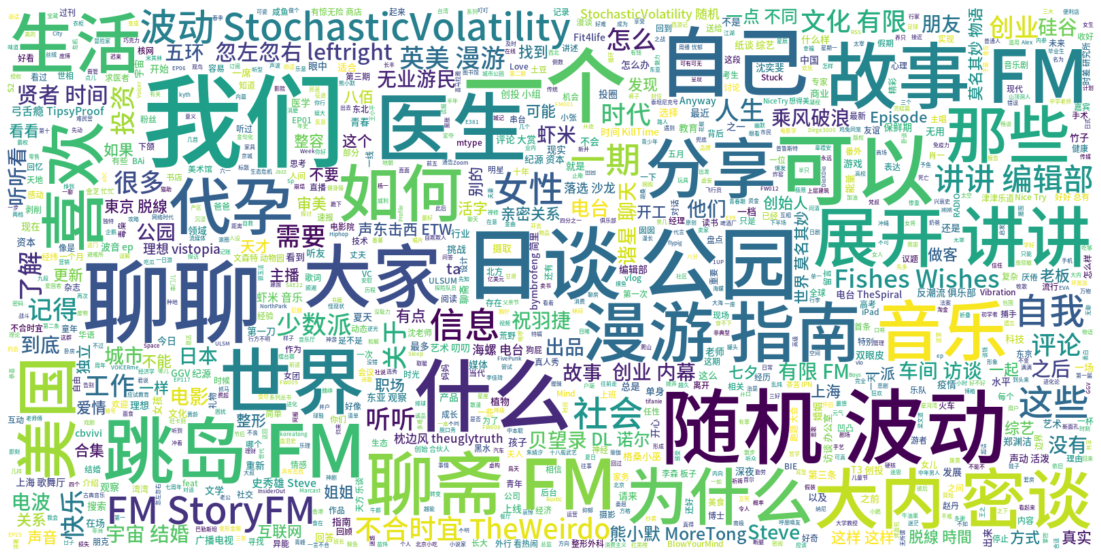

In [13]:

import matplotlib.font_manager as fm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# stopwords are the words that the wordcloud will ignore
stopwords = set(STOPWORDS)
stopwords.update(["我们", "什么", "可以","自己"])

#you should have the font file already installed. calling the font.
path = 'NotoSanSC-Medium.otf'
fontprop = fm.FontProperties(fname=path, size= 15)

# define your plot. width,height and others.
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="/content/NotoSansSC-Medium.otf",width=1600, height=800, max_font_size=150, max_words=1000, background_color="white").generate(mytext)
%pylab inline
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
# you will get a word cloud with the size you defined.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#store to file
plt.savefig("cloud.png", format="png", bbox_inches='tight')

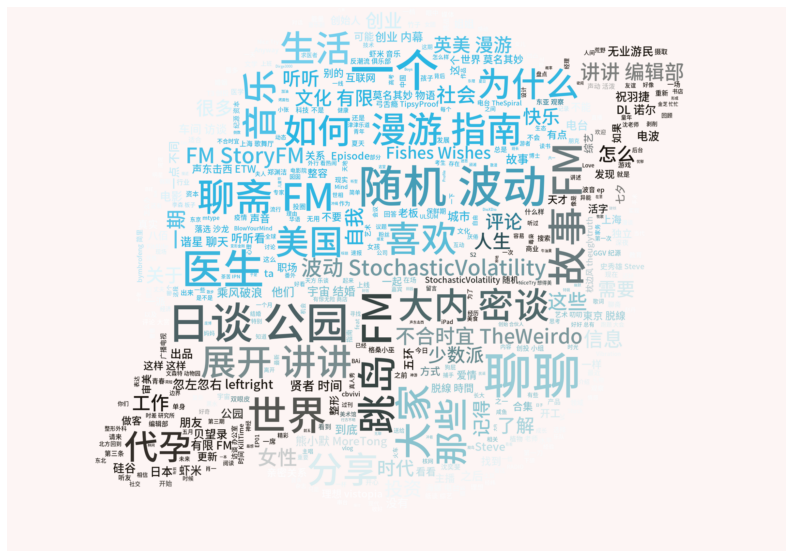

In [15]:
# Here is the much more fun version. 
# Create a wordcloud that looks like xiaoyuzhou's logo
# follow this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["我们", "什么", "可以","自己"])

# Generate a word cloud image
# Here I drew a xiaoyuzhou logo myself. You can find the image here: https://sm.ms/image/vpVzBtbJ27icFdj
# upload the image
mask = np.array(Image.open("xiaoyuzhou_logo.jpg"))
wordcloud_color = WordCloud(font_path="/content/NotoSansSC-Medium.otf",stopwords=stopwords, width=1600, height=800, max_font_size=150,background_color="#fdf5f4", max_words=500, mask=mask).generate(mytext)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_color.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("wordcloud_generate.png", format="png")
plt.show()


In [16]:
#download the file to local
from google.colab import files
files.download("wordcloud_generate.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>